Visualising data using Dimensionality Reduction


We'll perform a dimensionality reduction technique to plot the observations in 2 dimensions.

We'll use two techniques:

1)Principal Component Analysis
2)t-SNE

In [ ]:
#Import libraries

import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load Data

# Dataframe
path_df = "/content/drive/My Drive/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "/content/drive/My Drive/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/content/drive/My Drive/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/content/drive/My Drive/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/content/drive/My Drive/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [ ]:
#Unify training and test sets. The initial shapes are:

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(1891, 300)
(334, 300)
(1891,)
(334,)


In [ ]:
#concatenation:

features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)

#check if the shapes are correct:


print(features.shape)
print(labels.shape)

(2225, 300)
(2225,)


In [ ]:
#define a function that comprises the whole visualization process:

def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'business',
        "1": 'entertainment',
        "2": 'politics',
        "3": 'sport',
        "4": 'tech'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen"],
                    alpha=.7).set_title(title);


**Dimensionality reduction with PCA**

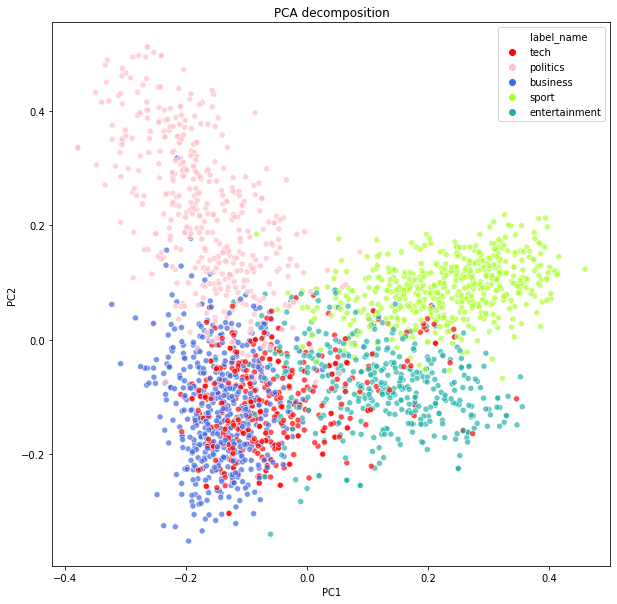

In [ ]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)


**Dimensionality Reduction with t-SNE**

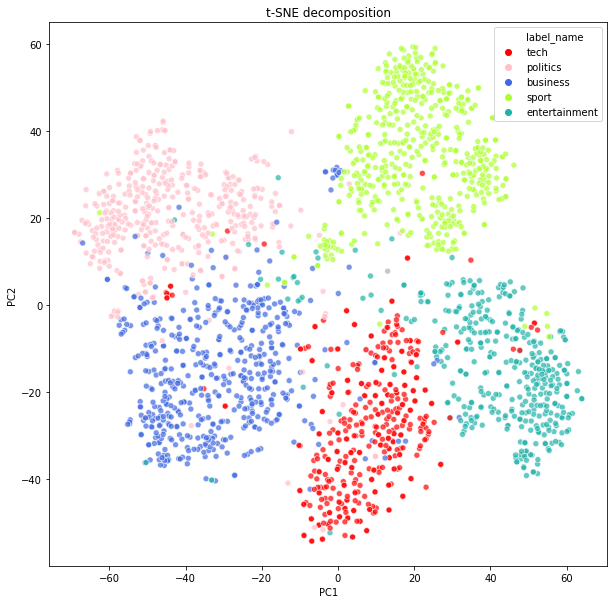

In [ ]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

We can see from both the above plottings that t-SNE works better for our data.